In [3]:
import os
import cv2
import matplotlib.pyplot as plt

path = "D:/data_for_seg/Raw/"
path_projection = "D:/data_for_DL/z_projection/"

folders = ['keep0','keep1','keep2','reseed0','reseed1','split','dead','empty']

all_folders = {}
for folder in folders:
    if not os.path.exists(path_projection + folder):
        os.mkdir(path_projection + folder)

    try:
        # Change the current working directory to the folder
        os.chdir(path+folder)
        # Example: List the contents of the current folder
        files = os.listdir()
        files_by_prefix = {}
        for file in files:
            if len(file) > 7:
                prefix = file[:3]
                if prefix not in files_by_prefix:
                    files_by_prefix[prefix] = []
                files_by_prefix[prefix].append(file)
            else:
                prefix = file[:3]+"_no_stack"
                if prefix not in files_by_prefix:
                    files_by_prefix[prefix] = []
                files_by_prefix[prefix].append(file)
        all_folders[folder] = files_by_prefix
        
    except FileNotFoundError:
        print(f"Folder not found: {folder}")

for folder_name, images_list in all_folders.items():
    for images_name, images in images_list.items():
        min_projection = cv2.imread(path+folder_name+"/"+images[0], cv2.IMREAD_GRAYSCALE)
        for image in images[1:]:
            image = cv2.imread(path+folder_name+"/"+image, cv2.IMREAD_GRAYSCALE)
            min_projection = cv2.min(min_projection, image)
        min_projection = cv2.resize(min_projection, (224,224))
        cv2.imwrite(path_projection+folder_name+"/"+images_name+".jpg", min_projection)
            

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [11]:
import os
import cv2
import matplotlib.pyplot as plt

path = "D:/RawDataLaurent/NT_top&combo_bot-Day1/"
path_projection = "D:/RawDataLaurent/z_projection/"

folders = ['Day1']

all_folders = {}
for folder in folders:
    if not os.path.exists(path_projection + folder):
        os.mkdir(path_projection + folder)

    try:
        # Change the current working directory to the folder
        os.chdir(path)
        # Example: List the contents of the current folder
        files = os.listdir()
        files_by_prefix = {}
        for file in files:
            prefix = file[-9:-6]
            if prefix not in files_by_prefix:
                files_by_prefix[prefix] = []
            files_by_prefix[prefix].append(file)
        all_folders[folder] = files_by_prefix
        
    except FileNotFoundError:
        print(f"Folder not found: {folder}")

for folder_name, images_list in all_folders.items():
    print(folder_name)
    for images_name, images in images_list.items():
        print(images)
        min_projection = cv2.imread(path+"/"+images[0], cv2.IMREAD_GRAYSCALE)
        for image in images[1:]:
            image = cv2.imread(path+"/"+image, cv2.IMREAD_GRAYSCALE)
            min_projection = cv2.min(min_projection, image)
        min_projection = cv2.resize(min_projection, (1000,1000))
        cv2.imwrite(path_projection+"/"+images_name+".jpg", min_projection)

Day1
['NT_top&combo_bot-Day1_s001z1.jpg', 'NT_top&combo_bot-Day1_s001z2.jpg', 'NT_top&combo_bot-Day1_s001z3.jpg', 'NT_top&combo_bot-Day1_s001z4.jpg', 'NT_top&combo_bot-Day1_s001z5.jpg']
['NT_top&combo_bot-Day1_s002z1.jpg', 'NT_top&combo_bot-Day1_s002z2.jpg', 'NT_top&combo_bot-Day1_s002z3.jpg', 'NT_top&combo_bot-Day1_s002z4.jpg', 'NT_top&combo_bot-Day1_s002z5.jpg']
['NT_top&combo_bot-Day1_s003z1.jpg', 'NT_top&combo_bot-Day1_s003z2.jpg', 'NT_top&combo_bot-Day1_s003z3.jpg', 'NT_top&combo_bot-Day1_s003z4.jpg', 'NT_top&combo_bot-Day1_s003z5.jpg']
['NT_top&combo_bot-Day1_s004z1.jpg', 'NT_top&combo_bot-Day1_s004z2.jpg', 'NT_top&combo_bot-Day1_s004z3.jpg', 'NT_top&combo_bot-Day1_s004z4.jpg', 'NT_top&combo_bot-Day1_s004z5.jpg']
['NT_top&combo_bot-Day1_s005z1.jpg', 'NT_top&combo_bot-Day1_s005z2.jpg', 'NT_top&combo_bot-Day1_s005z3.jpg', 'NT_top&combo_bot-Day1_s005z4.jpg', 'NT_top&combo_bot-Day1_s005z5.jpg']
['NT_top&combo_bot-Day1_s006z1.jpg', 'NT_top&combo_bot-Day1_s006z2.jpg', 'NT_top&combo_bot

In [2]:
def show_multiple_images(segmented_images, separation_width):
    for i in range(1, len(segmented_images)):
        segmented_images.insert(i, np.ones((segmented_images[0].shape[0], separation_width), dtype=np.uint8) * 255)

    # Combine segmented images side by side
    combined_image = np.hstack(segmented_images)
    
    # Display the combined image
    plt.imshow(combined_image, cmap='gray')
    plt.axis('off')
    plt.show()

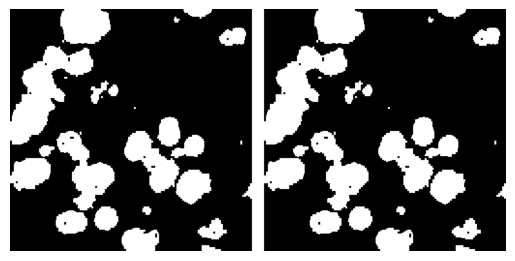

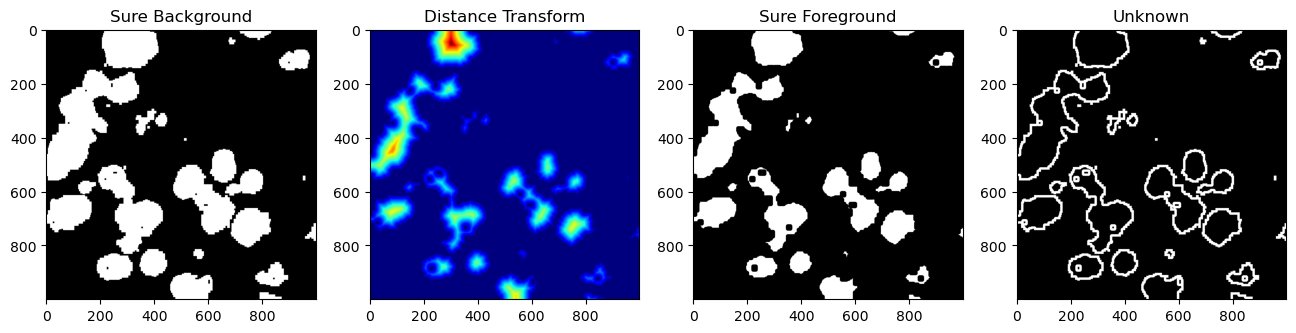

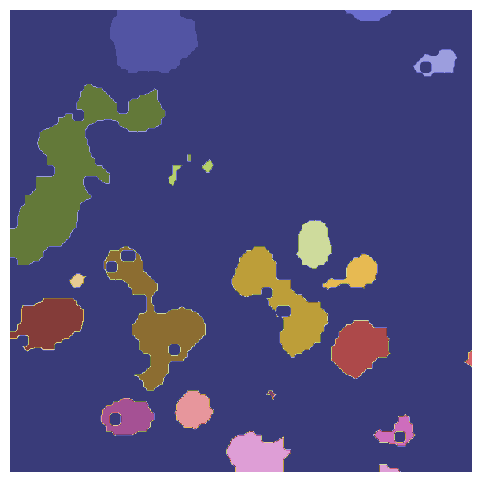

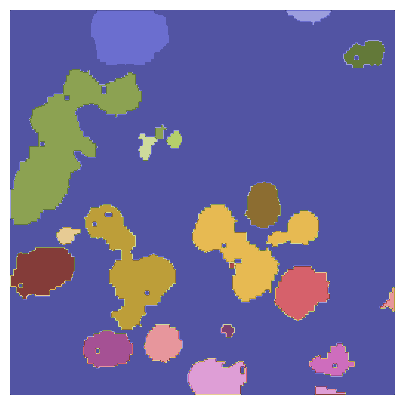

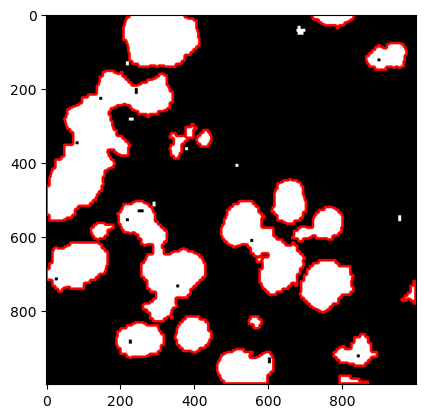

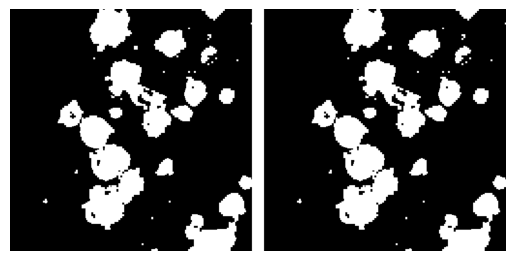

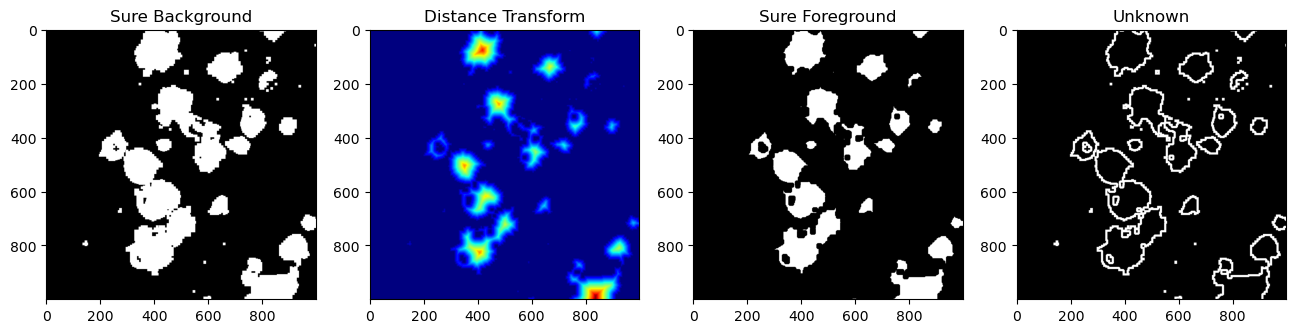

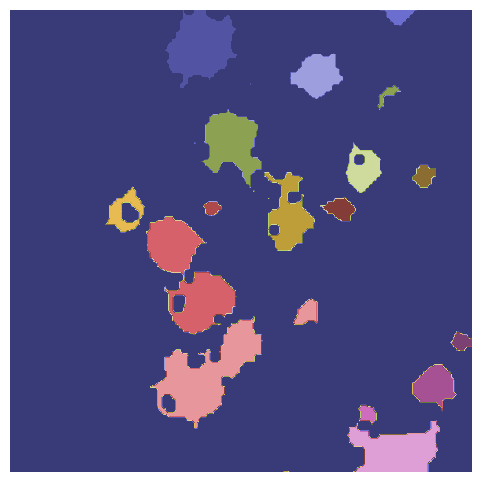

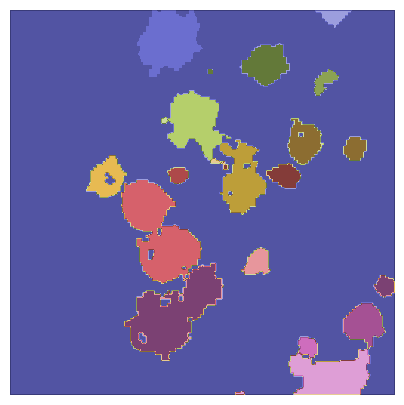

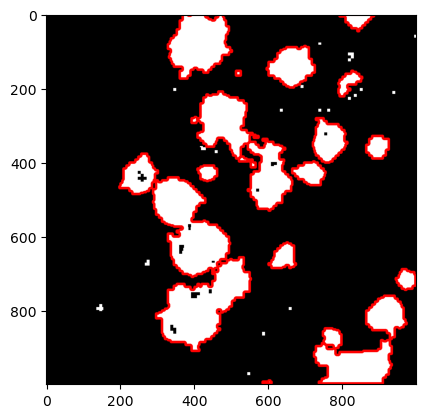

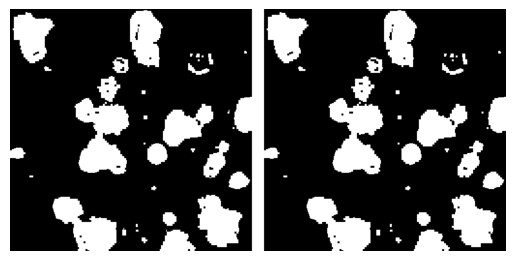

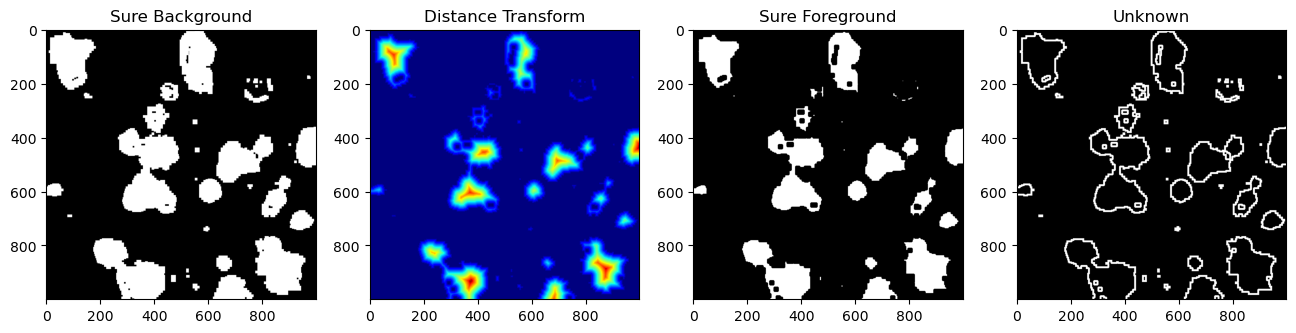

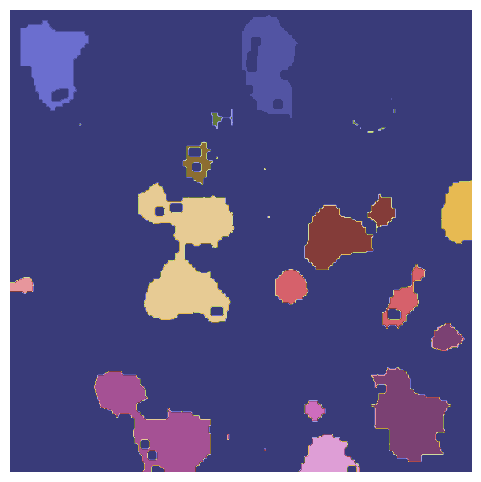

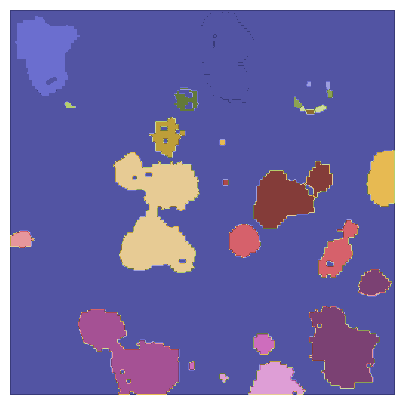

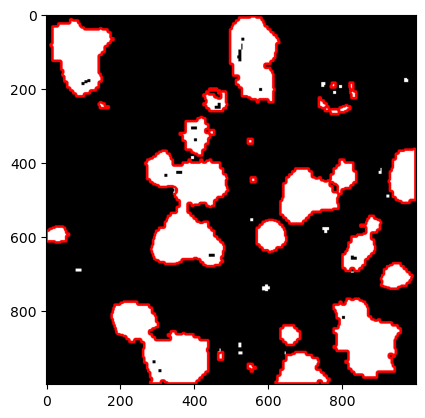

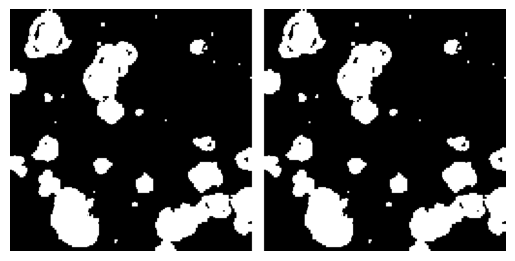

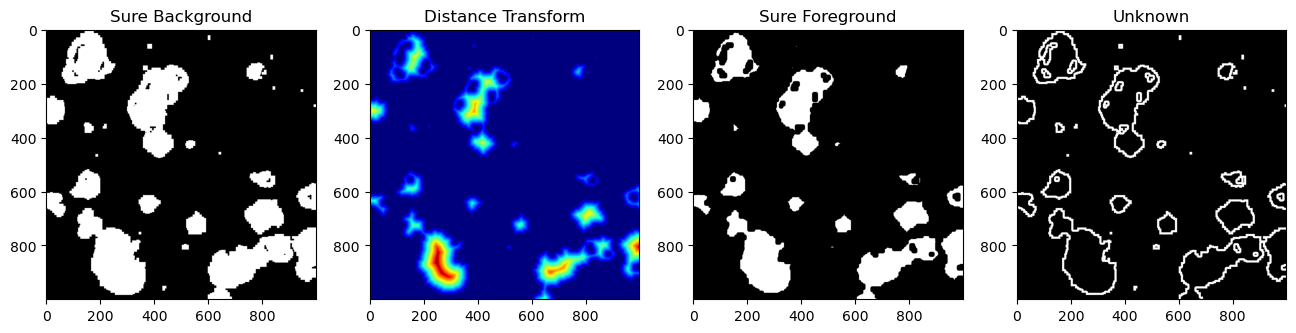

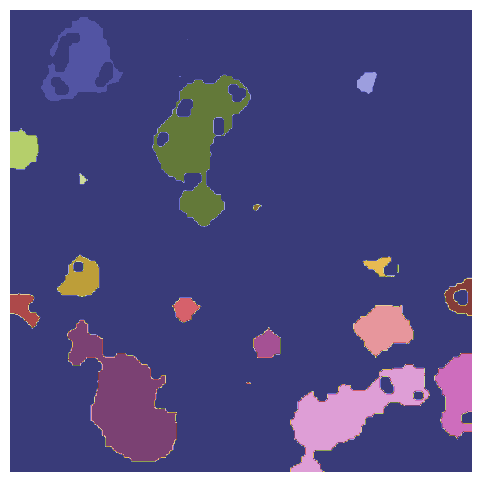

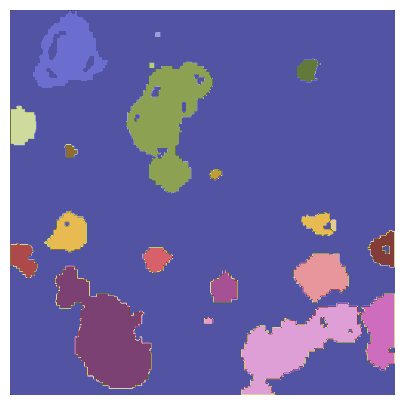

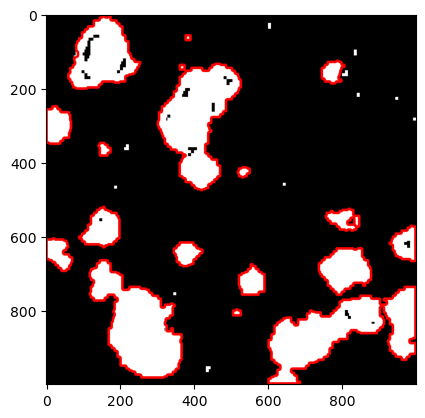

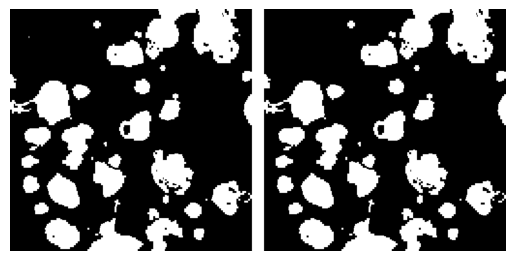

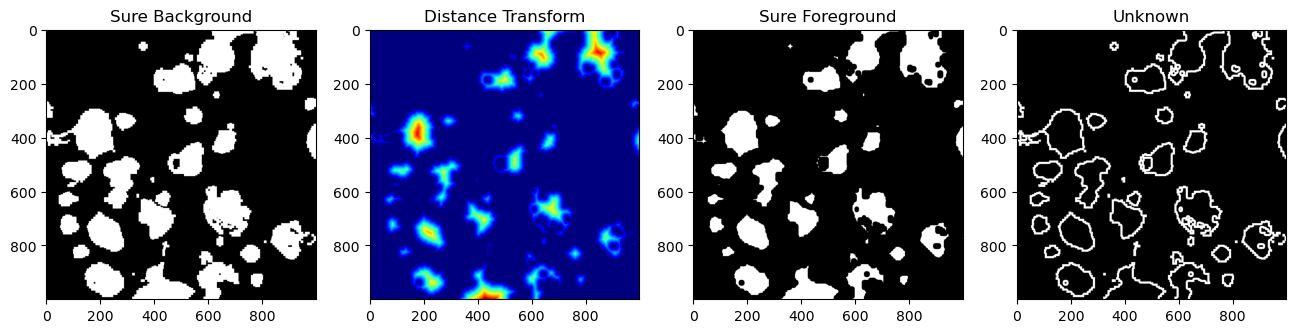

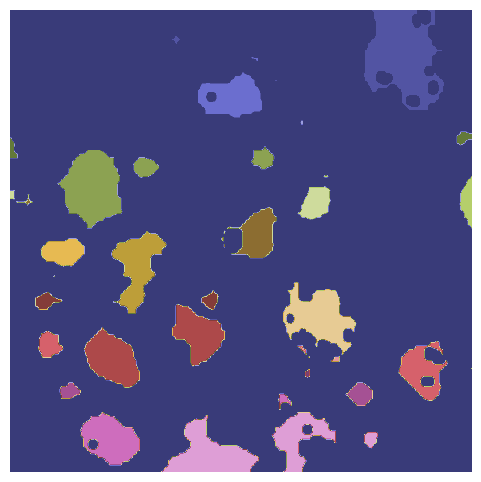

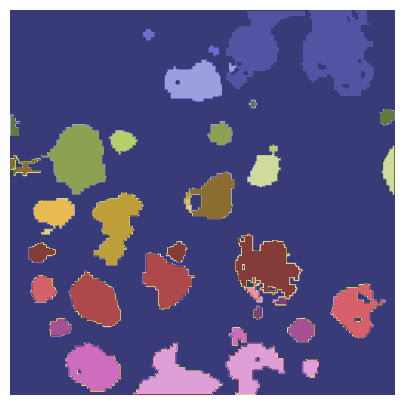

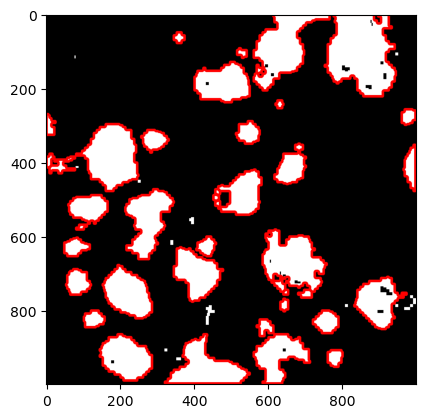

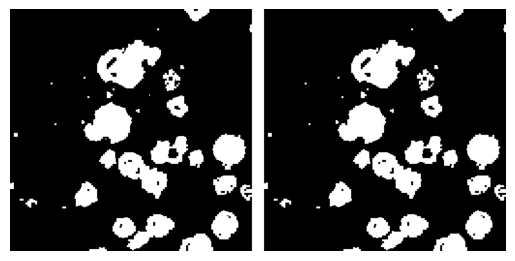

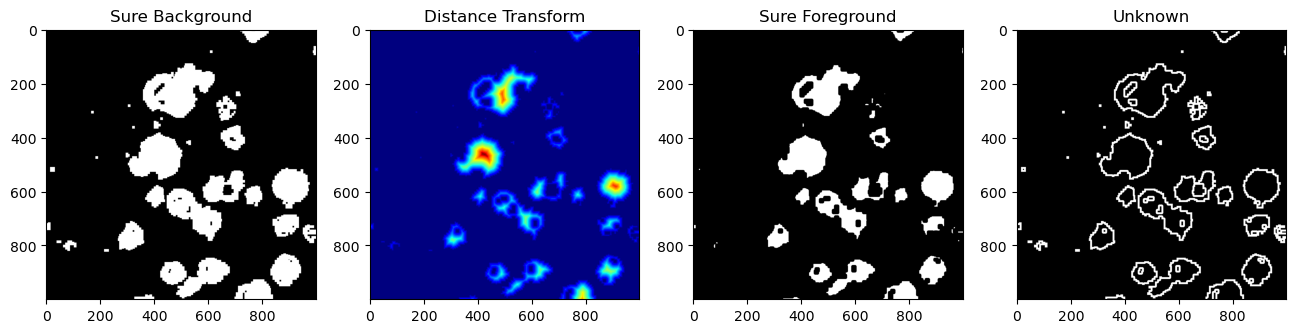

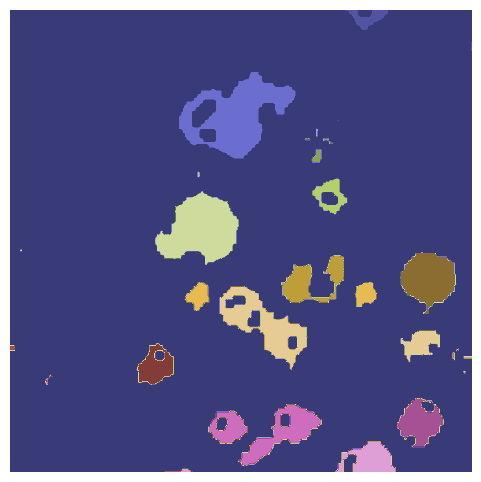

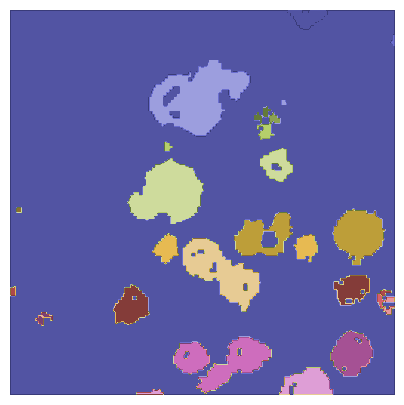

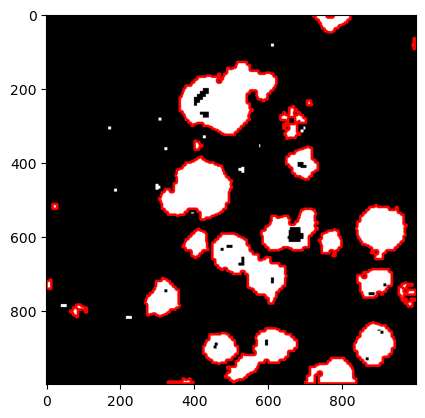

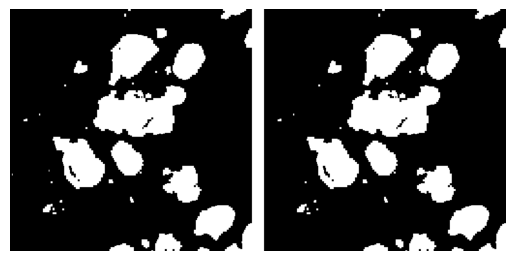

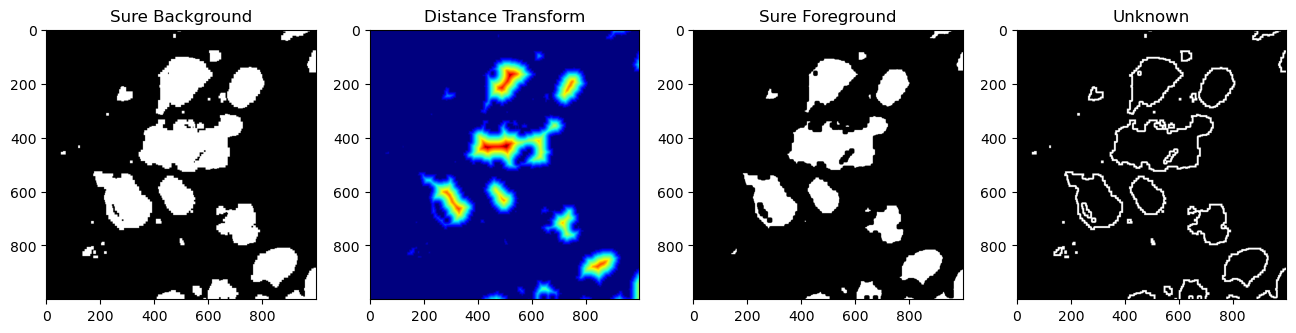

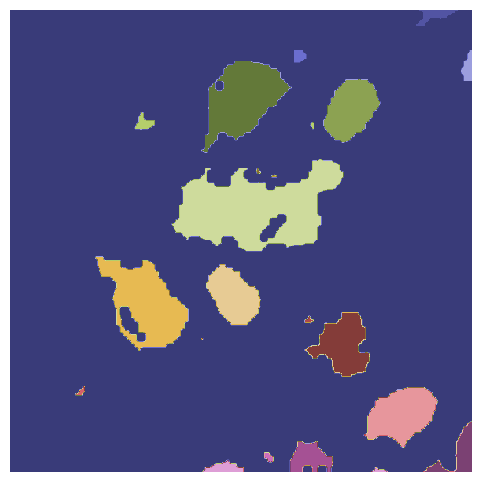

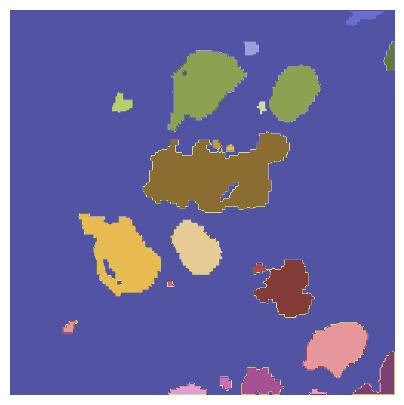

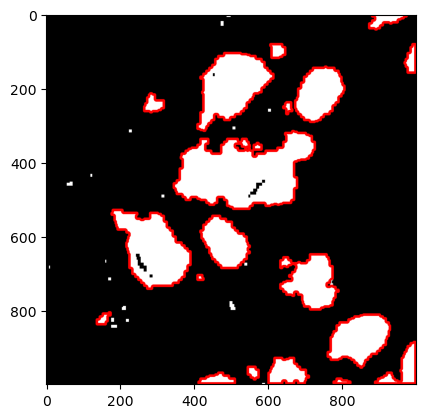

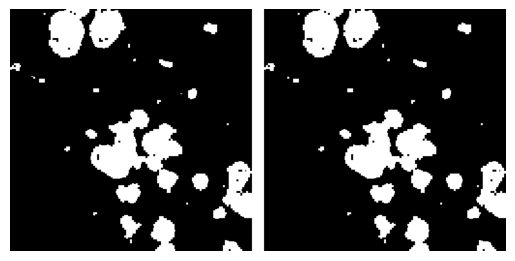

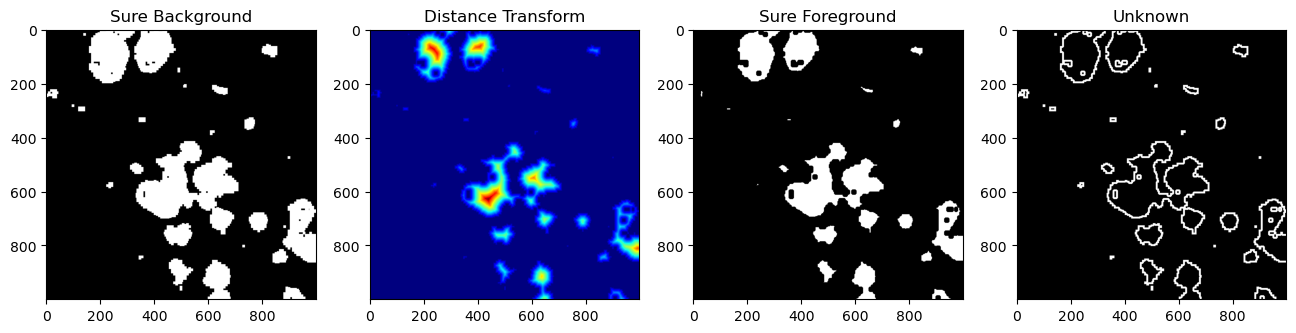

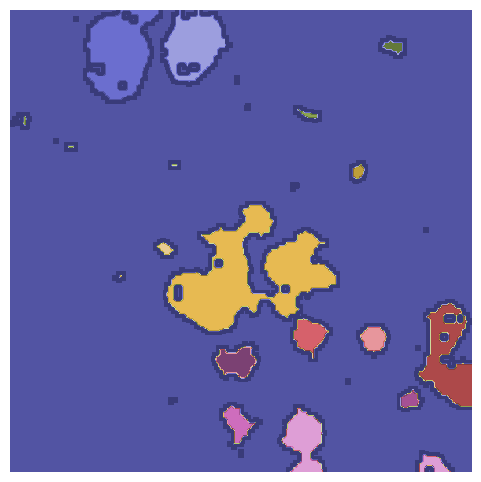

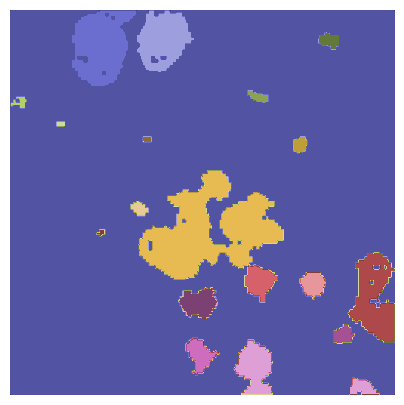

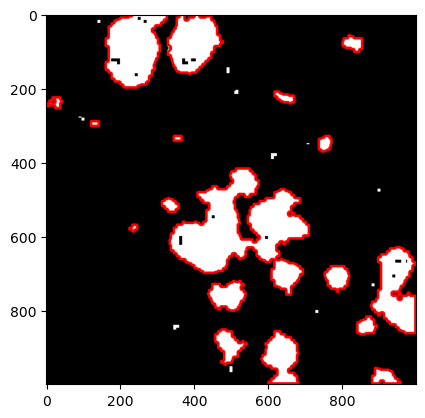

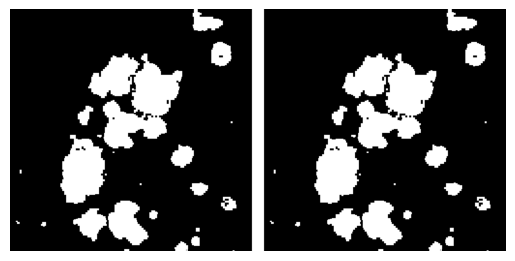

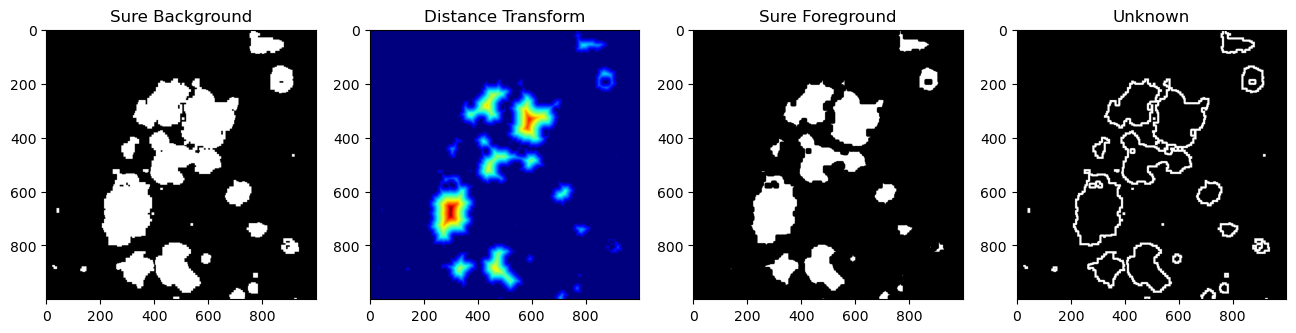

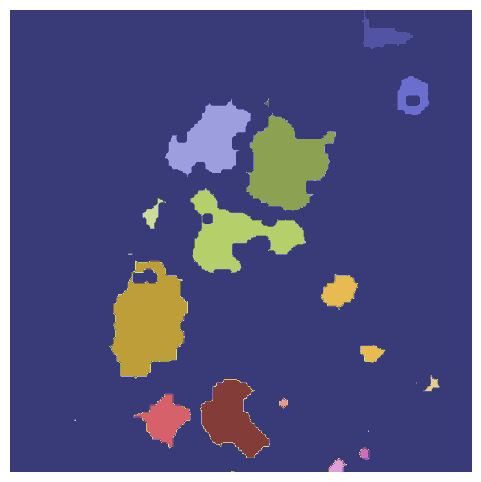

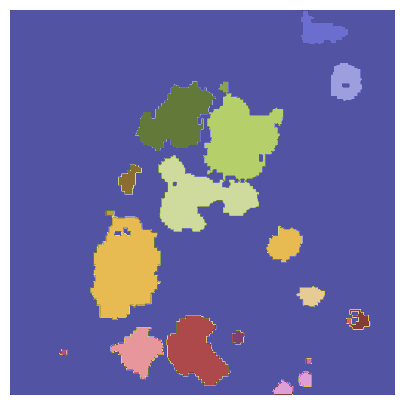

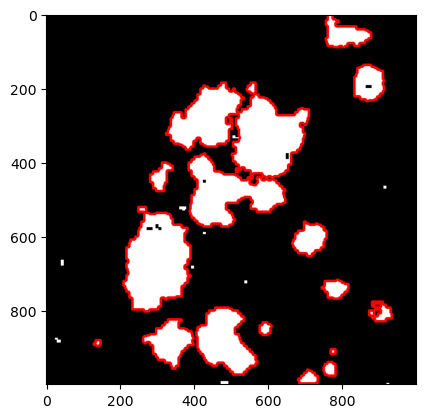

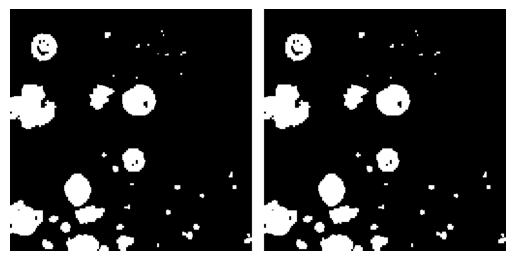

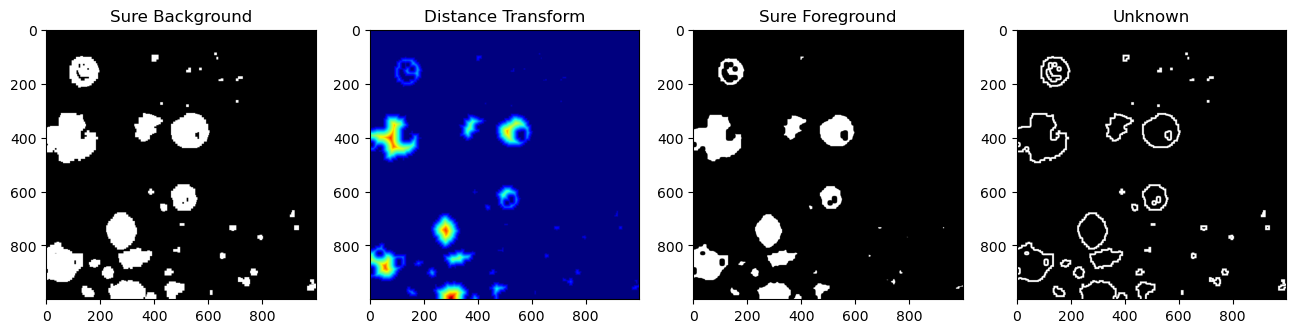

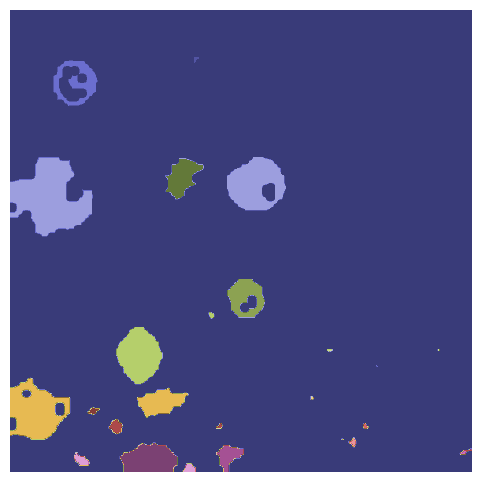

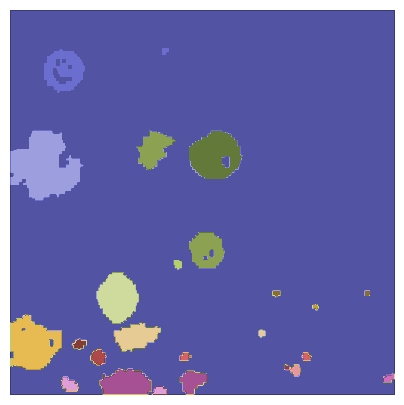

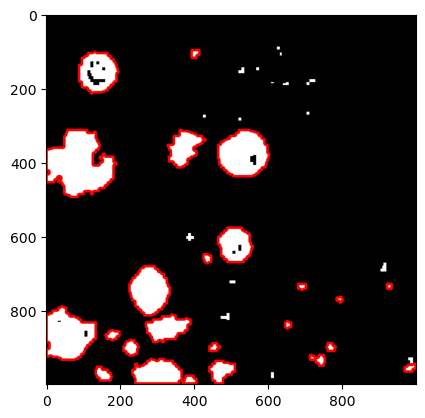

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

os.chdir("E:/data_for_seg/z_projection/receed1")
# Example: List the contents of the current folder
files = os.listdir()

for file in files:
    if "Simple" in file:
        all_images = []
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Ensure it's loaded as grayscale
        image = np.where(image == 255, 0, 255)
        all_images.append(image)
        image = image.astype(np.uint8)

        # Apply threshold to create a binary image
        _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
        bin_img = cv2.morphologyEx(binary_image,  
                                   cv2.MORPH_OPEN, 
                                   kernel, 
                                   iterations=2)
        all_images.append(bin_img)
        show_multiple_images(all_images, 50)


        # Create subplots with 1 row and 2 columns 
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

        # sure background area
        sure_bg = cv2.dilate(bin_img, kernel, iterations=1)
        axes[0].imshow(sure_bg, cmap='gray')
        axes[0].set_title('Sure Background')

        # Distance transform
        dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 0)
        axes[1].imshow(dist, cmap='jet')
        axes[1].set_title('Distance Transform')

        # Foreground area
        ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
        sure_fg = sure_fg.astype(np.uint8)
        axes[2].imshow(sure_fg, cmap='gray')
        axes[2].set_title('Sure Foreground')

        # Unknown area
        unknown = cv2.subtract(sure_bg, sure_fg)
        axes[3].imshow(unknown, cmap='gray')
        axes[3].set_title('Unknown')

        plt.show()

        # Marker labelling 
        # sure foreground  
        ret, markers = cv2.connectedComponents(sure_fg) 
          
        # Add one to all labels so that background is not 0, but 1 
        markers += 1
        # mark the region of unknown with zero 
        markers[unknown == 255] = 0
          
        fig, ax = plt.subplots(figsize=(6, 6)) 
        ax.imshow(markers, cmap="tab20b") 
        ax.axis('off') 
        plt.show()

        # watershed Algorithm 
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        markers = cv2.watershed(image, markers) 
          
        fig, ax = plt.subplots(figsize=(5, 5)) 
        ax.imshow(markers, cmap="tab20b") 
        ax.axis('off') 
        plt.show() 
          
          
        labels = np.unique(markers) 
          
        coins = [] 
        for label in labels[2:]:   
          
        # Create a binary image in which only the area of the label is in the foreground  
        #and the rest of the image is in the background    
            target = np.where(markers == label, 255, 0).astype(np.uint8) 
            
          # Perform contour extraction on the created binary image 
            contours, hierarchy = cv2.findContours( 
                target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
            ) 
            coins.append(contours[0]) 
          
        # Draw the outline 
        img = cv2.drawContours(image, coins, -1, color=(255,0,0), thickness=5) 
        plt.imshow(img)
        plt.show()